<a href="https://colab.research.google.com/github/rhrdiana/Kecerdasan-Buatan-25/blob/main/MatkulAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print(X.head())
print(y.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [9]:
pd.DataFrame({
    'Aktual': y_test.values[:10],
    'Prediksi': y_pred_lr[:10]
})


,Aktual,Prediksi
0,219.0,139.547558
1,70.0,179.517208
2,202.0,134.038756
3,230.0,291.417029
4,111.0,123.789659
5,84.0,92.172347
6,242.0,258.232389
7,272.0,181.337321
8,94.0,90.224113
9,96.0,108.633759


In [10]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [11]:
pd.DataFrame({
    'Aktual': y_test.values[:10],
    'Prediksi_DT': y_pred_dt[:10]
})

,Aktual,Prediksi_DT
0,219.0,157.807692
1,70.0,171.672414
2,202.0,157.807692
3,230.0,246.620690
4,111.0,113.596154
5,84.0,105.842105
6,242.0,237.666667
7,272.0,246.620690
8,94.0,195.000000
9,96.0,171.672414


In [12]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [13]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Decision Tree - MSE: {mse_dt:.2f}, R²: {r2_dt:.2f}")
print(f"SVR - MSE: {mse_svr:.2f}, R²: {r2_svr:.2f}")


Linear Regression - MSE: 2900.19, R²: 0.45
Decision Tree - MSE: 3526.02, R²: 0.33
SVR - MSE: 3784.29, R²: 0.29


In [14]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (353, 10)
X_test: (89, 10)
y_train: (353,)
y_test: (89,)


In [15]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [16]:
df_eval = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'SVR'],
    'MSE': [mse_lr, mse_dt, mse_svr],
    'R2': [r2_lr, r2_dt, r2_svr]
})
df_eval

,Model,MSE,R2
0,Linear Regression,2900.193628,0.452603
1,Decision Tree,3526.015512,0.334482
2,SVR,3784.286671,0.285735


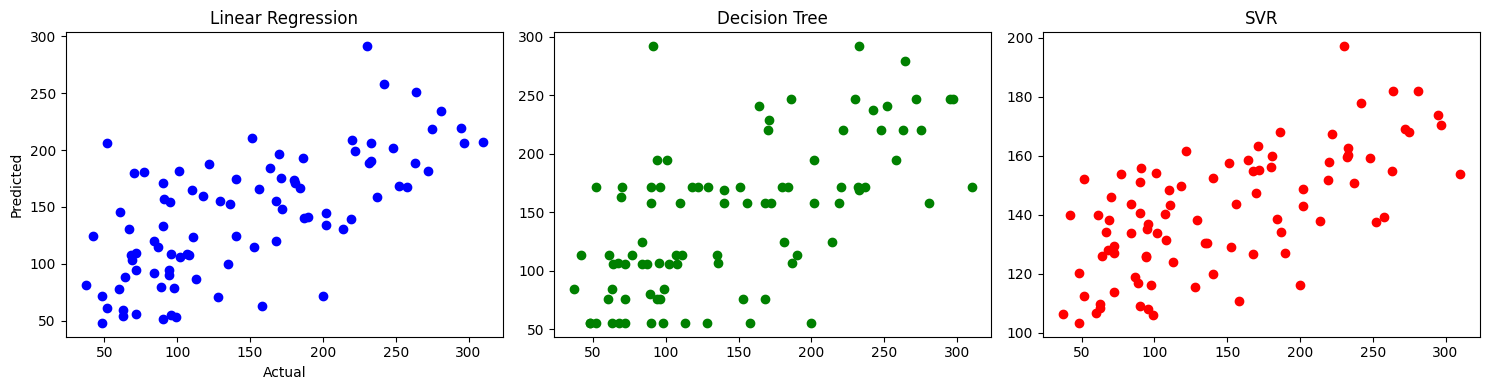

In [17]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, color='green')
plt.title('Decision Tree')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_svr, color='red')
plt.title('SVR')

plt.tight_layout()
plt.show()


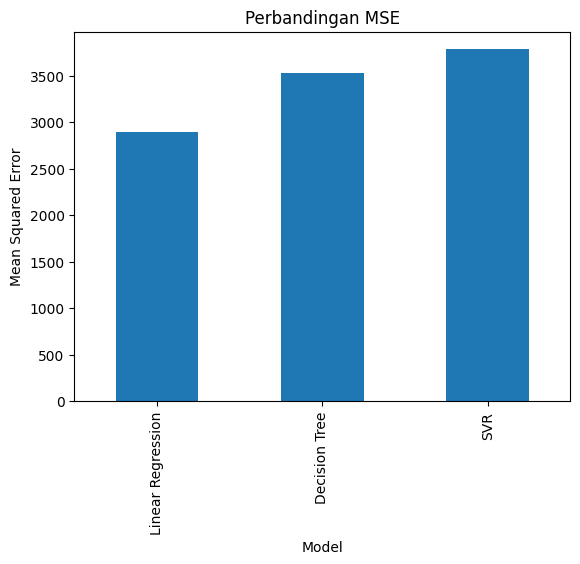

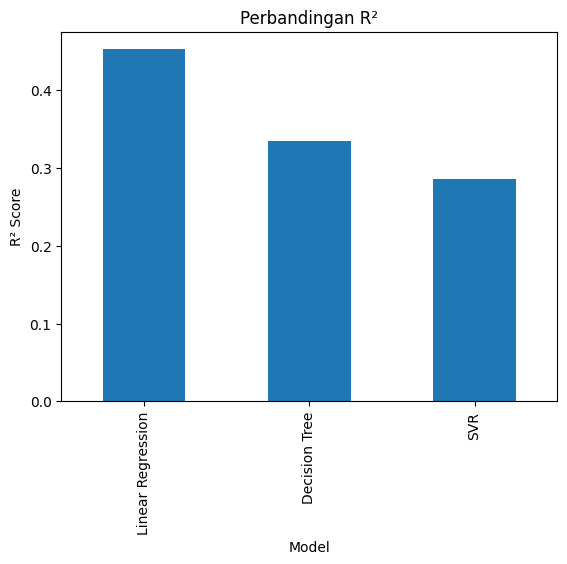

In [19]:
df_eval.plot(x='Model', y='MSE', kind='bar', title='Perbandingan MSE', legend=False)
plt.ylabel('Mean Squared Error')
plt.show()

df_eval.plot(x='Model', y='R2', kind='bar', title='Perbandingan R²', legend=False)
plt.ylabel('R² Score')
plt.show()

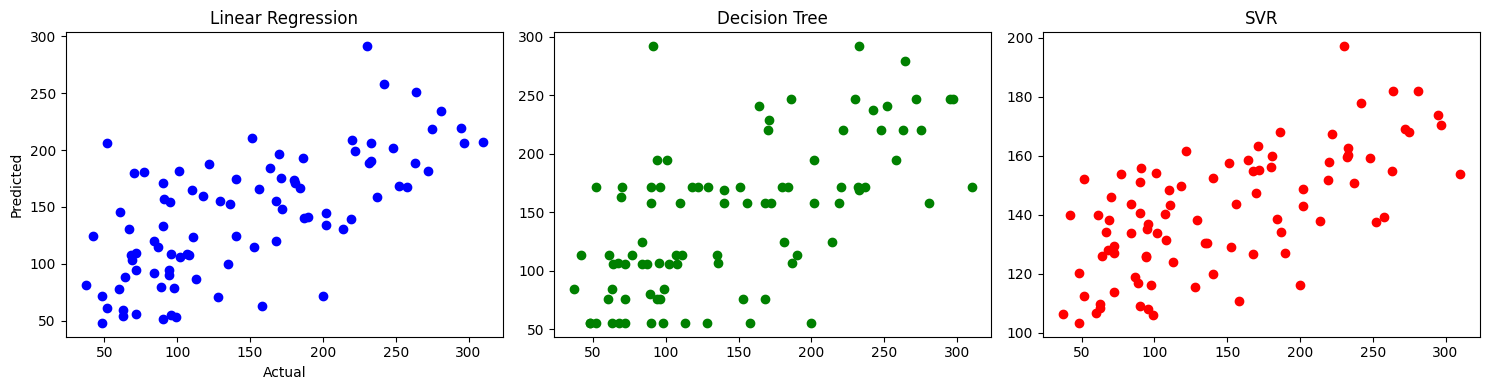

In [20]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, color='green')
plt.title('Decision Tree')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_svr, color='red')
plt.title('SVR')

plt.tight_layout()
plt.show()


In [21]:
from sklearn.neural_network import MLPRegressor

In [22]:
ann = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

In [23]:
ann.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [25]:
y_pred_ann = ann.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"MSE ANN: {mse_ann:.2f}")
print(f"RMSE ANN: {rmse_ann:.2f}")
print(f"MAE ANN: {mae_ann:.2f}")
print(f"R² ANN: {r2_ann:.2f}")

MSE ANN: 2900.26
RMSE ANN: 53.85
MAE ANN: 42.63
R² ANN: 0.45


In [31]:
df_eval = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'SVR', 'ANN'],
    'MSE': [mse_lr, mse_dt, mse_svr, mse_ann],
    'R2': [r2_lr, r2_dt, r2_svr, r2_ann]
})

print(df_eval)

               Model          MSE        R2
0  Linear Regression  2900.193628  0.452603
1      Decision Tree  3526.015512  0.334482
2                SVR  3784.286671  0.285735
3                ANN  2900.255458  0.452591


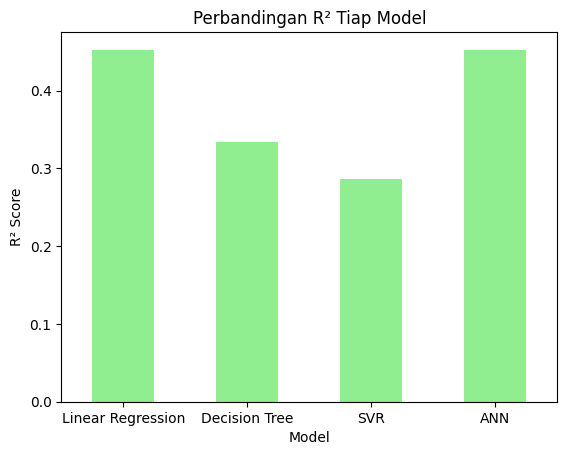

In [32]:
df_eval.plot(
    x='Model',
    y='R2',
    kind='bar',
    legend=False,
    color='lightgreen',
    title='Perbandingan R² Tiap Model'
)
plt.ylabel('R² Score')
plt.xticks(rotation=0)
plt.show()

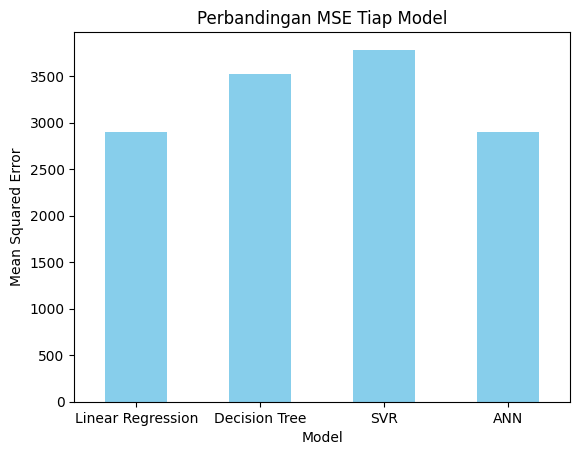

In [33]:
df_eval.plot(
    x='Model',
    y='MSE',
    kind='bar',
    legend=False,
    color='skyblue',
    title='Perbandingan MSE Tiap Model'
)
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=0)
plt.show()

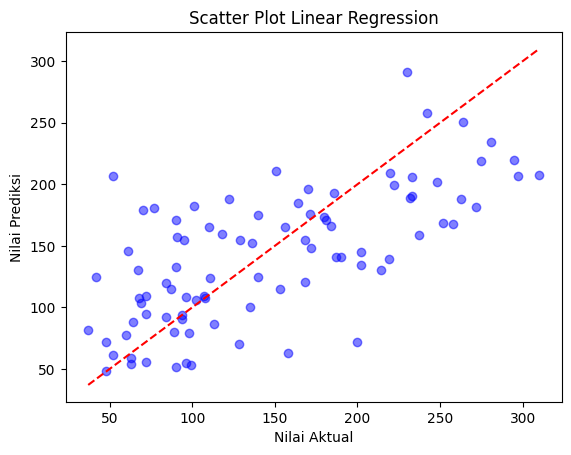

In [34]:
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis identitas
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot Linear Regression')
plt.show()

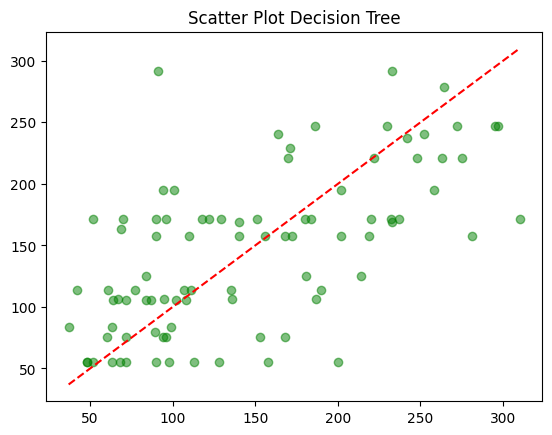

In [35]:
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Scatter Plot Decision Tree')
plt.show()

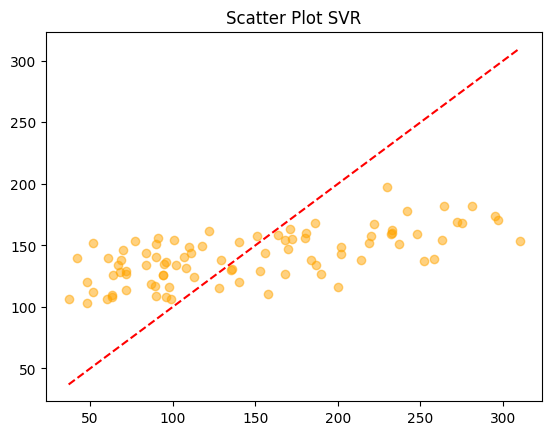

In [36]:
plt.scatter(y_test, y_pred_svr, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Scatter Plot SVR')
plt.show()

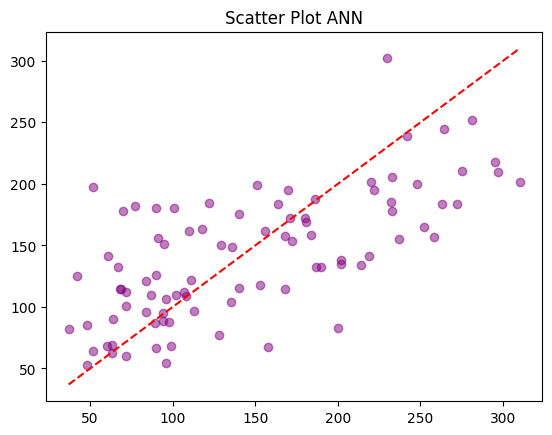

In [37]:
plt.scatter(y_test, y_pred_ann, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Scatter Plot ANN')
plt.show()